In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.model_selection import GridSearchCV

## Cleaning

In [272]:
filePath = 'D:/SDSU/CS649_Project/Skyserver_SQL4_7_2022 12_58_52 AM.csv'

In [273]:
skyObj = pd.read_csv(filePath,skiprows=1, index_col='objid')
skyObj = skyObj.sort_index()

In [274]:
# To run quick algos, try sample data set
sampleDataSet = skyObj.sample(int(len(skyObj)*0.01))
skyObj = sampleDataSet

In [275]:
skyObj.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1.237660e+18,175.491944,40.819307,18.54334,18.42617,18.27246,18.29259,18.21325,4469,301,6,...,42.61163,49.09236,48.1901,51.83335,2.218120e+18,QSO,1.018203,1970,53386,351
1.237660e+18,118.018370,15.460091,19.09160,17.22154,16.33369,15.89514,15.56294,4517,301,1,...,129.23550,292.76820,438.4731,595.42200,2.341930e+18,GALAXY,0.050723,2080,53350,222
1.237660e+18,334.684420,-8.976132,16.80441,15.79183,15.40113,15.14750,14.95094,2576,301,3,...,482.24750,691.11270,872.9732,1046.22100,8.095430e+17,GALAXY,0.038181,719,52203,75
1.237660e+18,136.445996,46.709171,17.03491,15.74026,15.15311,15.04387,14.91838,2825,301,5,...,505.70350,868.47430,960.4023,1078.07300,1.011210e+18,STAR,-0.000140,898,52606,538
1.237660e+18,212.480042,35.587193,19.53697,17.81303,16.81920,16.35117,16.00413,4002,301,1,...,74.95269,187.20510,288.0932,396.59440,1.849920e+18,GALAXY,0.124230,1643,53143,258


In [276]:
skyObj.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5000 entries, 1.23766e+18 to 1.23766e+18
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ra           5000 non-null   float64
 1   dec          5000 non-null   float64
 2   u            5000 non-null   float64
 3   g            5000 non-null   float64
 4   r            5000 non-null   float64
 5   i            5000 non-null   float64
 6   z            5000 non-null   float64
 7   run          5000 non-null   int64  
 8   rerun        5000 non-null   int64  
 9   camcol       5000 non-null   int64  
 10  field        5000 non-null   int64  
 11  modelFlux_u  5000 non-null   float64
 12  modelFlux_g  5000 non-null   float64
 13  modelFlux_r  5000 non-null   float64
 14  modelFlux_i  5000 non-null   float64
 15  modelFlux_z  5000 non-null   float64
 16  specobjid    5000 non-null   float64
 17  class        5000 non-null   object 
 18  redshift     5000 non-null   

In [277]:
skyObj.isna().any()

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
run            False
rerun          False
camcol         False
field          False
modelFlux_u    False
modelFlux_g    False
modelFlux_r    False
modelFlux_i    False
modelFlux_z    False
specobjid      False
class          False
redshift       False
plate          False
mjd            False
fiberid        False
dtype: bool

In [278]:
skyObjData = skyObj[['ra','dec','u','g','r','i','z','run', 'rerun', 'camcol', 'field','modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z','redshift','plate','mjd','class']]

In [279]:
skyObjData

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd,class
objid,,,,,,,,,,,,,,,,,,,,
1.237660e+18,175.491944,40.819307,18.54334,18.42617,18.27246,18.29259,18.21325,4469,301,6,400,38.25243,42.61163,49.09236,48.1901,51.83335,1.018203,1970,53386,QSO
1.237660e+18,118.018370,15.460091,19.09160,17.22154,16.33369,15.89514,15.56294,4517,301,1,34,23.08569,129.23550,292.76820,438.4731,595.42200,0.050723,2080,53350,GALAXY
1.237660e+18,334.684420,-8.976132,16.80441,15.79183,15.40113,15.14750,14.95094,2576,301,3,88,189.77380,482.24750,691.11270,872.9732,1046.22100,0.038181,719,52203,GALAXY
1.237660e+18,136.445996,46.709171,17.03491,15.74026,15.15311,15.04387,14.91838,2825,301,5,208,153.47470,505.70350,868.47430,960.4023,1078.07300,-0.000140,898,52606,STAR
1.237660e+18,212.480042,35.587193,19.53697,17.81303,16.81920,16.35117,16.00413,4002,301,1,39,15.31713,74.95269,187.20510,288.0932,396.59440,0.124230,1643,53143,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.237660e+18,132.913182,8.474163,18.47975,16.46364,15.50998,15.06601,14.71383,4380,301,1,118,40.55959,259.74240,625.18500,941.0176,1301.57100,0.064398,1760,53086,GALAXY
1.237670e+18,276.337333,22.012914,19.19579,16.95967,16.07603,15.75237,15.56178,4832,301,4,166,20.97316,164.48790,371.18430,500.0927,596.05600,-0.000195,2534,53917,STAR
1.237670e+18,190.049021,34.090442,19.33838,17.52408,16.60460,16.21903,15.88133,4576,301,2,476,18.39183,97.80637,228.11730,325.3784,444.08500,0.084888,2020,53431,GALAXY


In [280]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,184.008519,27.099240,18.638750,17.414021,16.890970,16.629874,16.477277,3176.491000,301.0,3.497600,190.318400,52.989974,217.150576,396.153438,518.820908,565.615118,0.173125,2214.910600,53624.125800
std,68.931442,20.490262,0.815921,0.987998,1.135792,1.211041,1.294046,1095.614293,0.0,1.588993,142.833113,113.391732,1933.968067,4216.011581,5190.729533,3772.559180,0.441987,2023.765298,1461.264089
min,0.011760,-10.906702,13.274810,9.782830,8.866426,8.637243,8.977151,109.000000,301.0,1.000000,11.000000,14.456130,12.850130,-0.020109,-0.011978,-5.443232,-0.004136,266.000000,51608.000000
25%,146.221455,7.829878,18.199800,16.833290,16.177830,15.843293,15.628210,2326.000000,301.0,2.000000,84.000000,19.646905,59.185513,92.073068,113.498025,124.018950,0.000025,957.750000,52557.500000
50%,186.348428,30.224080,18.867060,17.526100,16.910190,16.613435,16.438595,3530.000000,301.0,3.000000,155.000000,28.389980,97.624640,172.156400,226.269300,265.802250,0.049697,1711.000000,53262.000000
75%,225.961321,43.331610,19.266713,18.069457,17.589670,17.362525,17.266243,3964.000000,301.0,5.000000,254.000000,52.490192,184.792075,337.962375,459.922300,560.680350,0.097463,2544.250000,54507.000000
max,359.662807,79.253253,19.599770,19.727680,24.892910,24.397940,25.013020,4836.000000,301.0,6.000000,806.000000,4898.653000,122142.800000,284072.700000,350834.700000,256530.900000,6.717972,11678.000000,58543.000000


In [281]:
# Drop dublicated features
skyObjData.drop_duplicates(inplace=True)

D:\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## Visualization

In [282]:
skyObjData['class'].value_counts()

GALAXY    2665
STAR      1798
QSO        537
Name: class, dtype: int64

In [283]:
targetCount = skyObjData['class'].value_counts()

In [284]:
print(f'Class 0: {targetCount[0]}')
print(f'Class 1: {targetCount[1]}')
print(f'Class 2: {targetCount[2]}')
print(f'Percentage of Majority Class: {round(targetCount[0] / sum(targetCount), 4)*100}')
print(f'Percentage of Minority Class: {round(targetCount[2] / sum(targetCount), 4)*100}')

Class 0: 2665
Class 1: 1798
Class 2: 537
Percentage of Majority Class: 53.300000000000004
Percentage of Minority Class: 10.74


<AxesSubplot:xlabel='class', ylabel='count'>

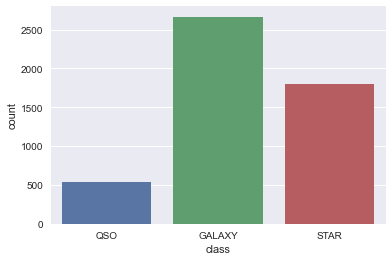

In [285]:
sns.countplot(x=skyObjData['class'],label="Count")

In [286]:
skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)

C:\Users\asus\AppData\Local\Temp/ipykernel_26656/3508656233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)


In [287]:
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class       
GALAXY False               1
       True             2664
QSO    True              537
STAR   False            1159
       True              639

<AxesSubplot:xlabel='class,redshift_class'>

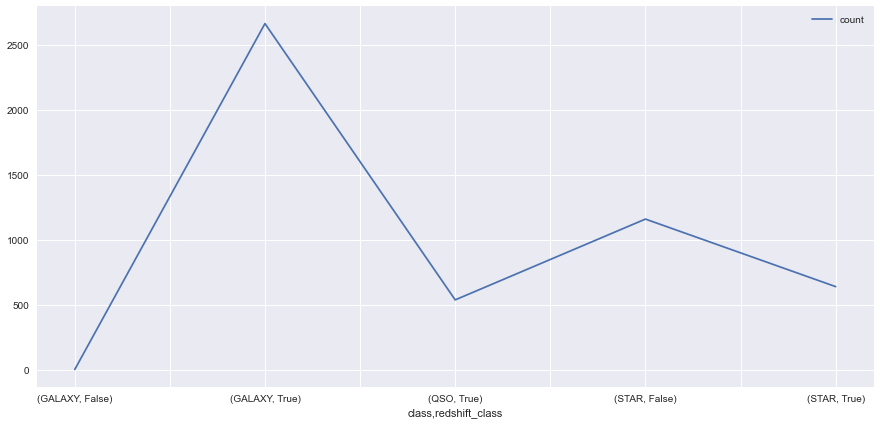

In [288]:
fig, ax = plt.subplots(figsize=(15,7))
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

<AxesSubplot:xlabel='ra', ylabel='dec'>

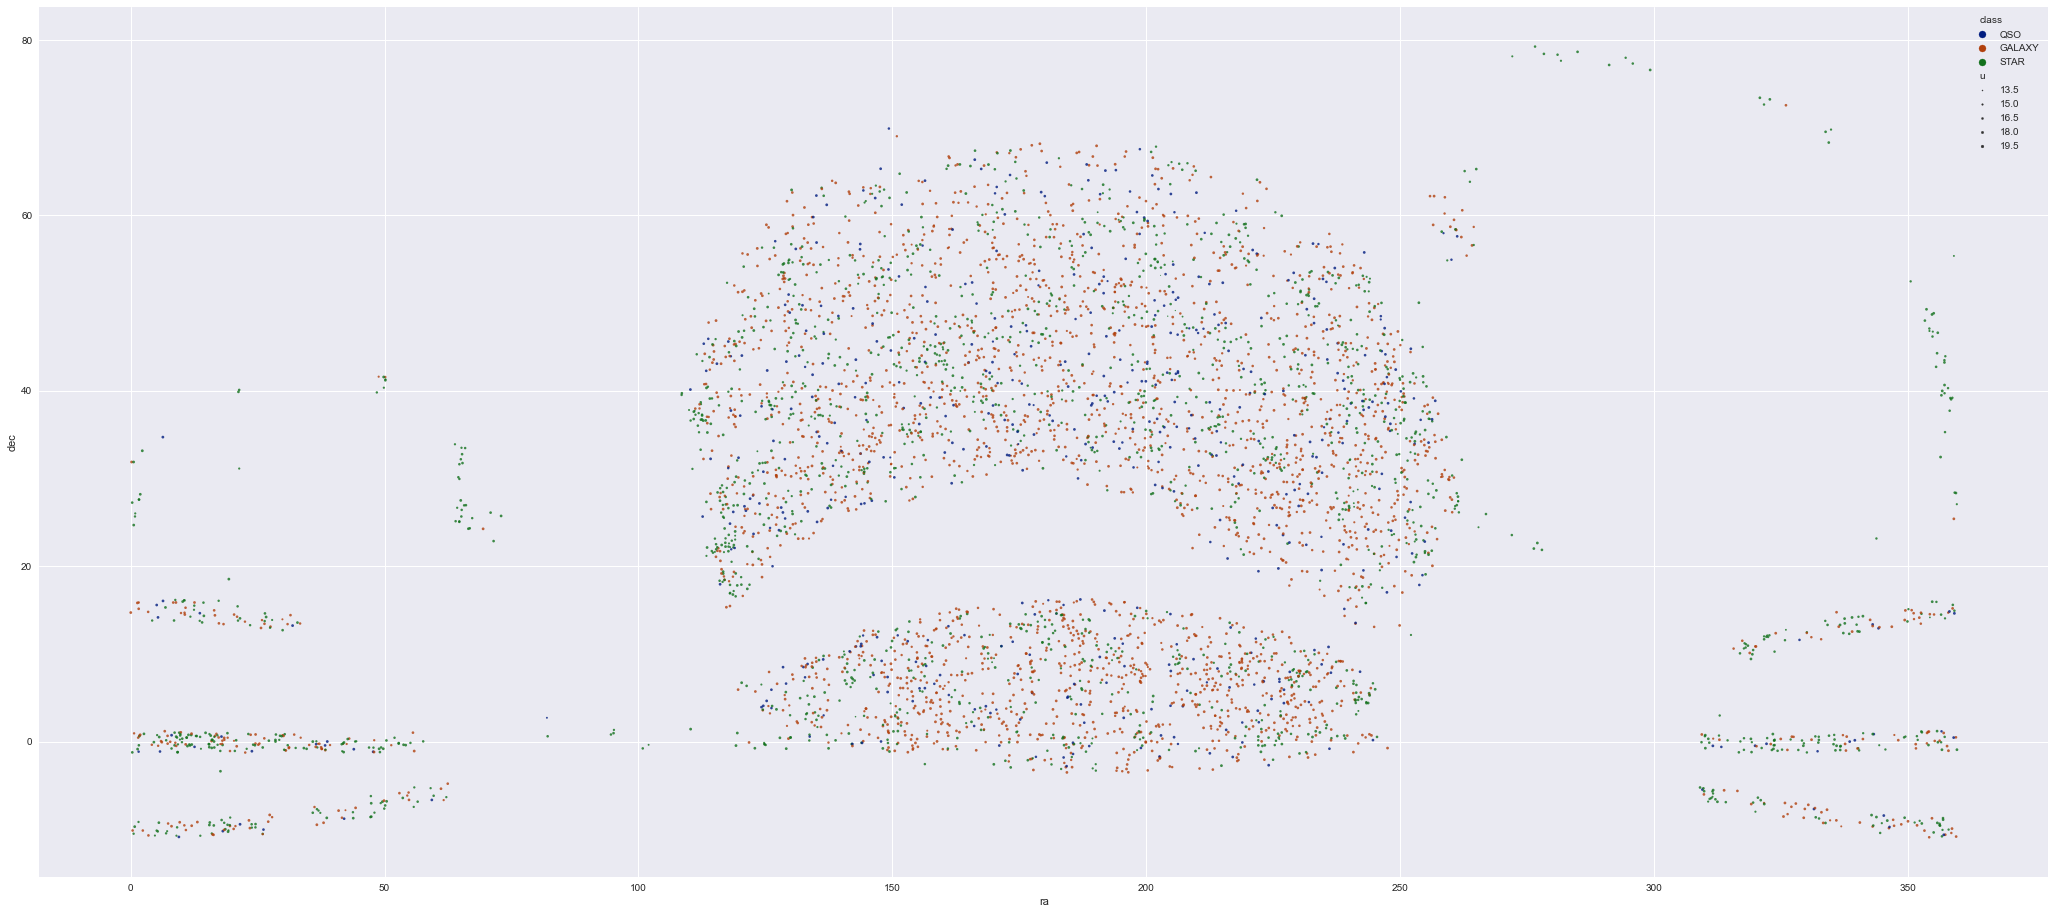

In [289]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=skyObjData)

In [290]:
sampleData = skyObjData.sample(int(len(skyObjData)*0.001))

ValueError: cannot reindex from a duplicate axis

<Figure size 1080x504 with 0 Axes>

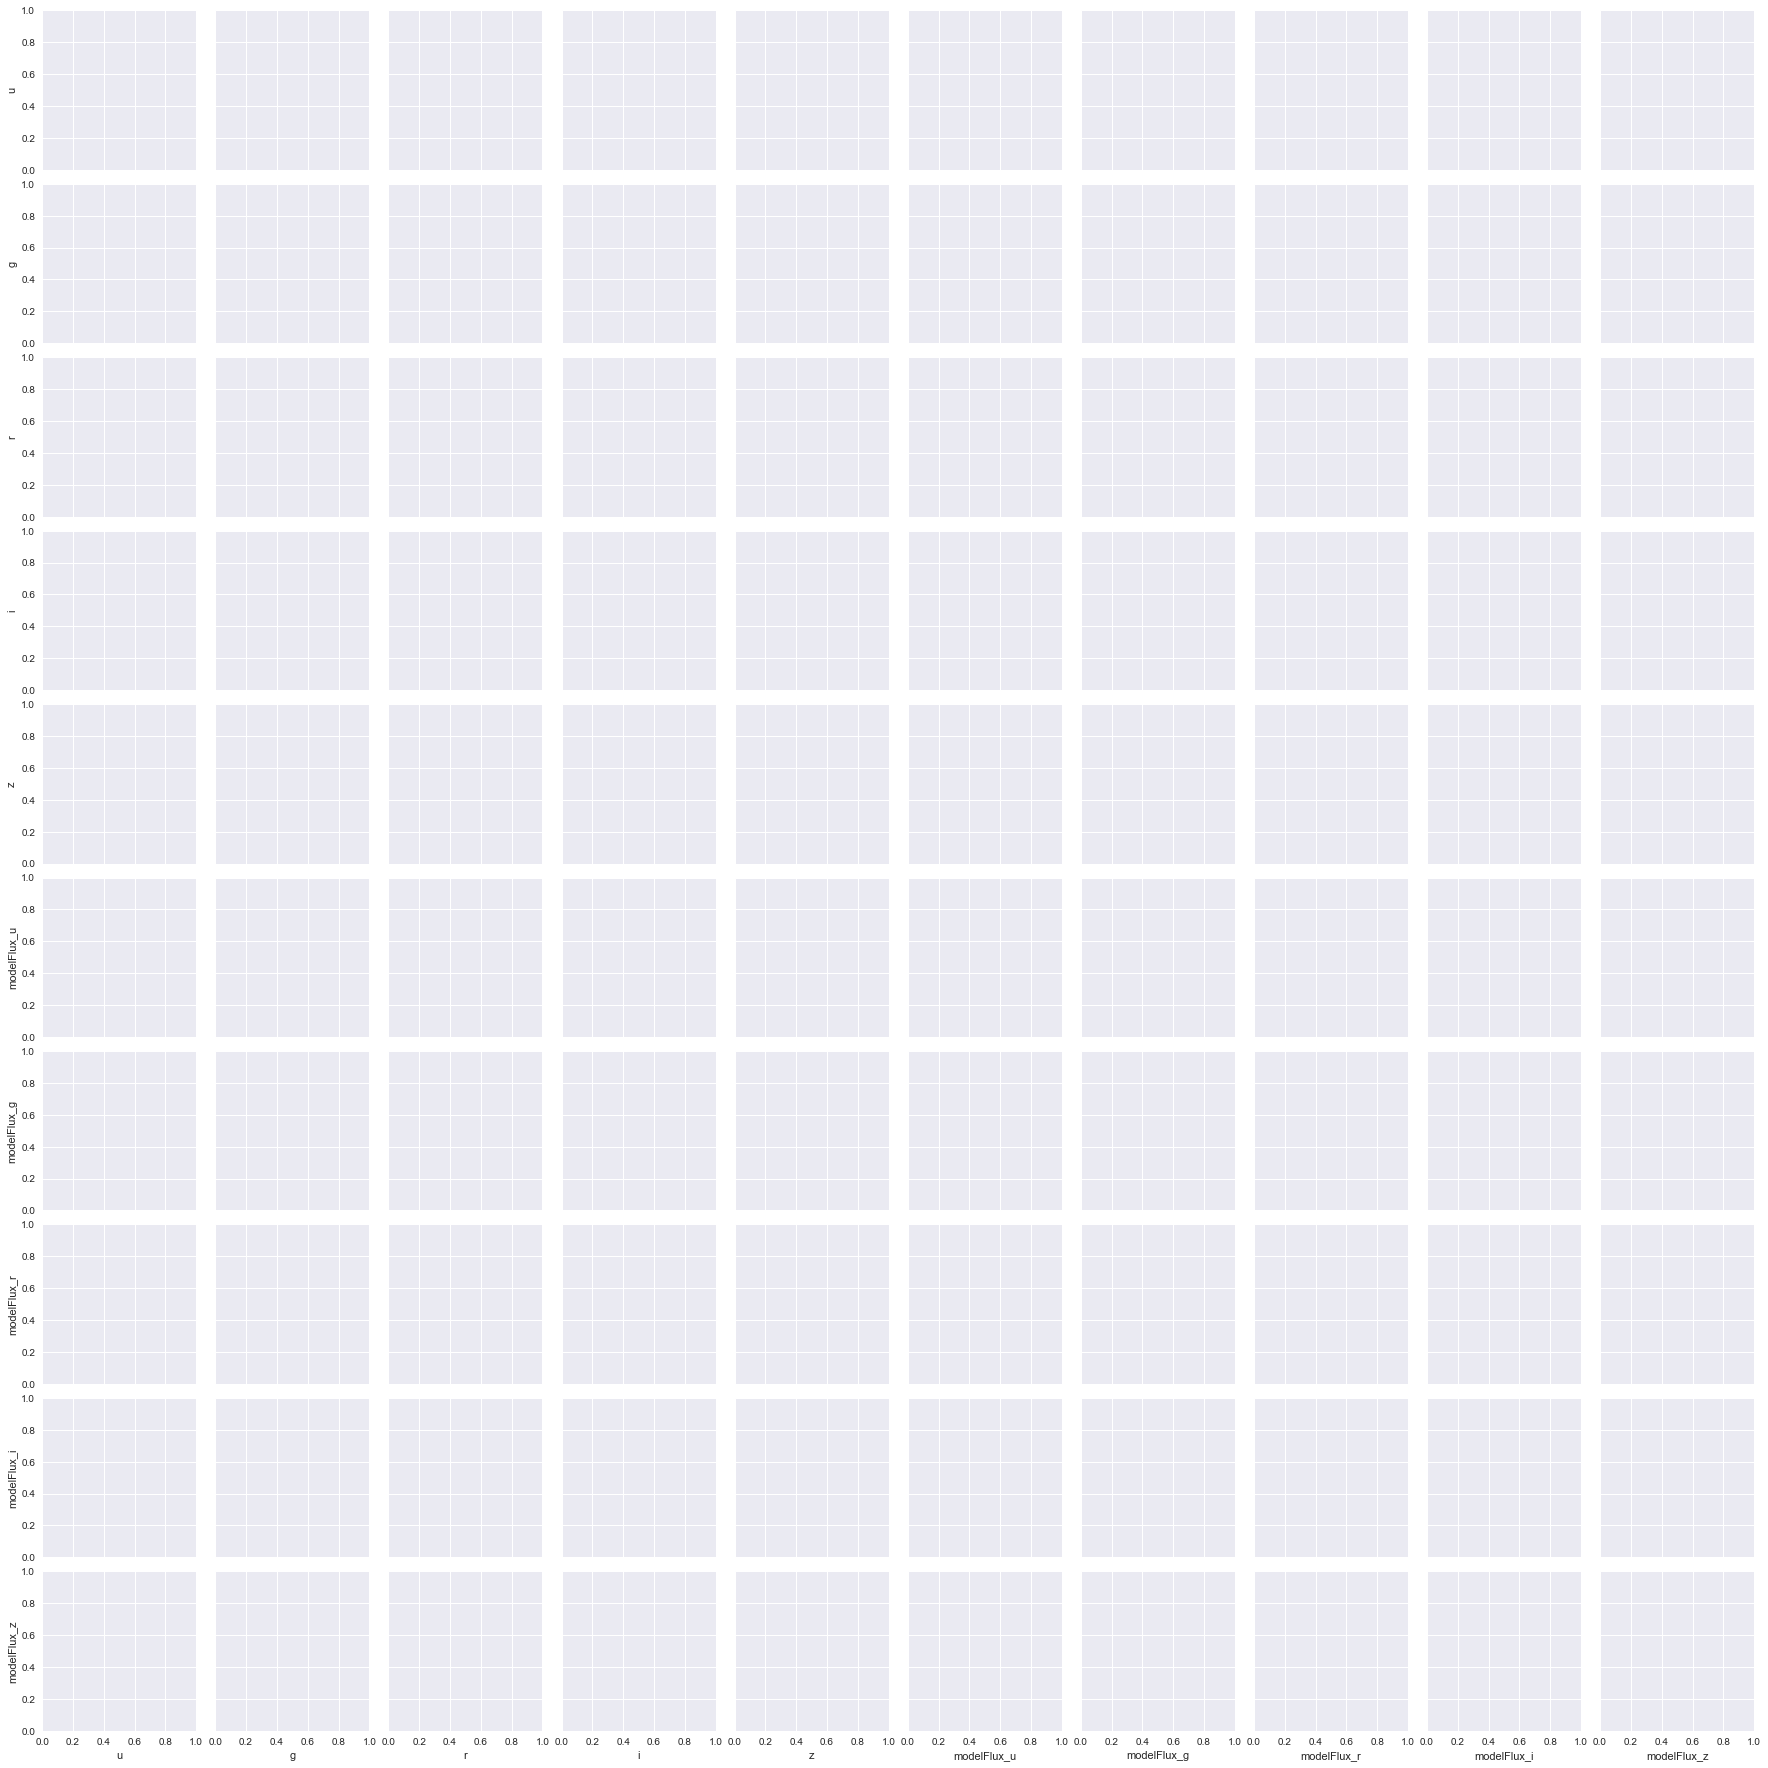

In [291]:
plt.figure(figsize = (15,7))
sns.pairplot(sampleData[['class', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z']], hue='class')

In [ ]:
plt.figure(figsize = (15,7))
sns.pairplot(sampleData[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

## Feature Engineering

In [ ]:
# Colour Indexes-difference between the two spectrum range
skyObjData['color_u_g'] = skyObjData['u'] - skyObjData['g']
skyObjData['color_g_r'] = skyObjData['g'] - skyObjData['r']
skyObjData['color_r_i'] = skyObjData['r'] - skyObjData['i']
skyObjData['color_i_z'] = skyObjData['i'] - skyObjData['z']

In [ ]:
skyObjData[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

In [ ]:
# conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = skyObjData.iloc[:, 11:16]
for i in cols:
    skyObjData[i] = skyObjData[i] * 3.631*(10**-6)

skyObjData.iloc[:, 11:16].describe()

In [ ]:
# log transformation to decrease the effect of the outliers

skyObjData['logRedshift'] = (skyObjData['redshift']+1).transform(np.log)

In [ ]:
# Encode target

objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
skyObjData['class'] = skyObjData['class'].map(objects)

In [ ]:
skyObjData.describe()

In [ ]:
# Reorder columns

skyObjData=skyObjData[['class', 'u', 'g', 'r', 'i', 'z',
        'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
skyObjData.head()

## Training

In [ ]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
# Utilize holdout data at the end for the most efficient algorithm

X_tr, X_holdout, y_tr, y_holdout = train_test_split(skyObjData.iloc[:, 1:18], skyObjData.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of my train set

In [ ]:
X_test.shape # shape of test data

In [ ]:
X_holdout.shape

In [ ]:
def plotConfusionMatrixDF(cnf):
    cnfDf = pd.DataFrame(cnf, index=['Galaxy','Star','Quasar'], columns=['Galaxy','Star','Quasar'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cnfDf, annot=True, fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [ ]:
comparisonColumns = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonData = []

def createComparisonTable(dataList):
    comparisonData.append(dataList)

In [ ]:
#This functions takes input as model, train data and returns predicted value of dependent variable
def model(model, modelName, X_train, y_train, addToTable=True):
    model.fit(X_train,y_train)
    classPrediction = model.predict(X_test)
    
    testAccuracy = round(accuracy_score(y_test,classPrediction)*100,2)
    precision, recall, f1score, support = score(y_test, classPrediction, average='macro')
    
    if addToTable:
        createComparisonTable([modelName,testAccuracy,precision,recall,f1score])
        
    return classPrediction

## Logistic Regression

In [ ]:
logisticRegression = LogisticRegression()
classPredictionLr=model(logisticRegression, 'Logistic Regression', X_train, y_train)
lrConfusionMatrix = confusion_matrix(y_test,classPredictionLr)
plotConfusionMatrixDF(lrConfusionMatrix)

## Naive Bayes

### GaussianNB 


In [ ]:
gaussianNB = GaussianNB()
gnbPrediction=model(gaussianNB, 'GaussianNB', X_train, y_train)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

### Bernoulli NB

In [ ]:
bernoulliNB = BernoulliNB()
bnbPrediction=model(bernoulliNB, 'BernoulliNB', X_train, y_train)
bnbConfusionMatrix = confusion_matrix(y_test,bnbPrediction)
plotConfusionMatrixDF(bnbConfusionMatrix)

## Linear SVC

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


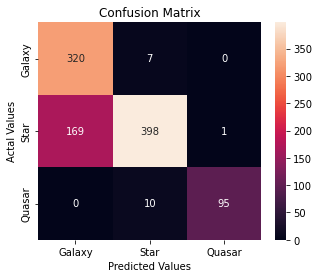

In [235]:
linearSVC = LinearSVC()
classPredictionSVC=model(linearSVC, 'Linear SVC', X_train, y_train)
svcConfusionMatrix = confusion_matrix(y_test,classPredictionSVC)
plotConfusionMatrixDF(svcConfusionMatrix)

## Decision Tree

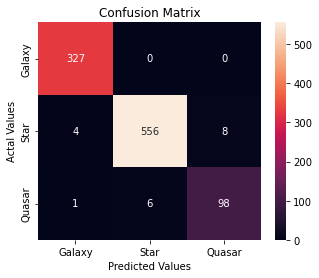

In [236]:
dtree = DecisionTreeClassifier()
classPredictionTree=model(dtree, 'Decision Tree', X_train, y_train)
dtreeConfusionMatrix = confusion_matrix(y_test,classPredictionTree)
plotConfusionMatrixDF(dtreeConfusionMatrix)

In [237]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

,importance
feature,
logRedshift,0.961985
color_u_g,0.008006
color_i_z,0.007907
z,0.006548
color_r_i,0.003308
ra,0.002354
dec,0.002314
u,0.001196
modelFlux_u,0.001138


## KNN

In [238]:
#skyObjDataSample=skyObjData.sample(frac=0.2)
#X_tr_sample, X_holdout_sample, y_tr_sample, y_holdout_sample = train_test_split(skyObjDataSample.iloc[:, 1:18], skyObjDataSample.loc[:, 'class'], test_size=0.2,random_state=76)
#X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_tr_sample, y_tr_sample, test_size=.25, random_state=76)
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimum error:- 0.367 at K = 0


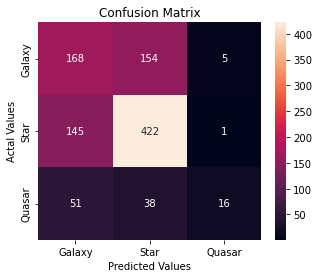

In [249]:
knn=KNeighborsClassifier(n_neighbors=5)
knnPrediction=model(knn, 'KNN', X_train, y_train)
knnConfusionMatrix = confusion_matrix(y_test,knnPrediction)
plotConfusionMatrixDF(knnConfusionMatrix)

## Bagging Algorithms

### Bagging Classifier

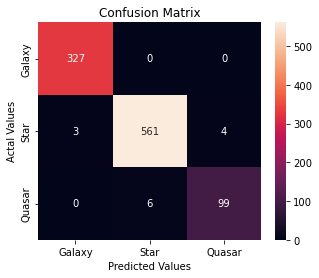

In [259]:
baggingClassifier = BaggingClassifier(base_estimator=dtree, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
bagginClassifierPrediction=model(baggingClassifier, 'Bagging Classifier', X_train, y_train)
bagConfusionMatrix = confusion_matrix(y_test,bagginClassifierPrediction)
plotConfusionMatrixDF(bagConfusionMatrix)

### Random Forest Classifier 

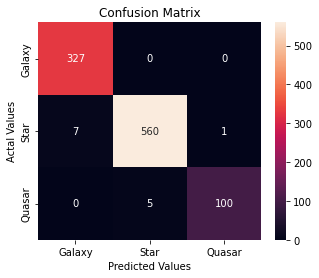

In [251]:
randomForestClassifier = RandomForestClassifier(n_estimators=100)
randomForestPrediction=model(randomForestClassifier, 'Random Forest Classifier', X_train, y_train)
randomForestConfusionMatrix = confusion_matrix(y_test,randomForestPrediction)
plotConfusionMatrixDF(randomForestConfusionMatrix)

## Boosting Algorithms 

### AdaBoost Classifier

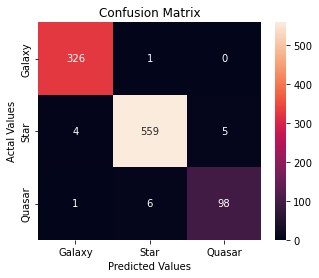

In [252]:
adaBoostclassifier = AdaBoostClassifier(base_estimator=dtree, n_estimators=100, random_state = 7)
adaBoostPrediction=model(adaBoostclassifier, 'Ada Boost Classifier', X_train, y_train)
adaBoostConfusionMatrix = confusion_matrix(y_test,adaBoostPrediction)
plotConfusionMatrixDF(adaBoostConfusionMatrix)

### Gradient Boosting Classification

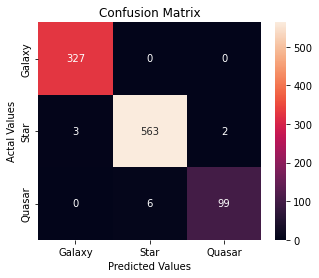

In [254]:
gradientBoostClassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=7)
gradientBoostPrediction=model(gradientBoostClassifier, 'Gradient Boost Classifier', X_train, y_train)
gradientBoostConfusionMatrix = confusion_matrix(y_test,gradientBoostPrediction)
plotConfusionMatrixDF(gradientBoostConfusionMatrix)

# Classifier Comparison

In [244]:
comparisonDF = pd.DataFrame(comparisonData,columns=comparisonColumns)

In [255]:
comparisonDF.sort_values('Testing Accuracy',inplace=True)
comparisonDF.reset_index(inplace=True)
comparisonDF.drop(columns=['index'],inplace=True)

In [256]:
comparisonDF

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,KNN,60.6,0.625369,0.469700,0.484088
1,KNN,60.6,0.625369,0.469700,0.484088
2,GaussianNB,67.7,0.743478,0.659557,0.545408
3,BernoulliNB,80.8,0.769697,0.697414,0.720807
4,Linear SVC,81.3,0.867672,0.861353,0.846451
5,Linear SVC,81.8,0.896326,0.766649,0.807140
6,Logistic Regression,84.9,0.871259,0.862614,0.861676
7,Decision Tree,98.1,0.966264,0.970736,0.968464
8,Decision Tree,98.1,0.970661,0.965560,0.968025
9,Ada Boost Classifier,98.3,0.974661,0.971477,0.973027


[Text(0, 0, 'KNN'),
 Text(1, 0, 'GaussianNB'),
 Text(2, 0, 'BernoulliNB'),
 Text(3, 0, 'Linear SVC'),
 Text(4, 0, 'Logistic Regression'),
 Text(5, 0, 'Decision Tree'),
 Text(6, 0, 'Ada Boost Classifier'),
 Text(7, 0, 'Bagging Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Gradient Boost Classifier')]

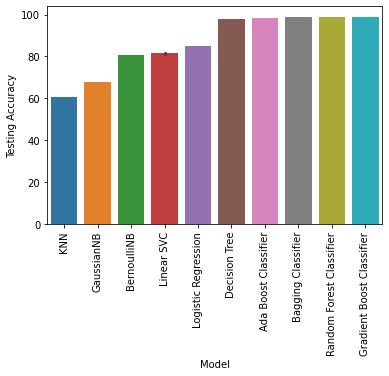

In [257]:
ax = sns.barplot(x="Model", y="Testing Accuracy", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'KNN'),
 Text(1, 0, 'GaussianNB'),
 Text(2, 0, 'BernoulliNB'),
 Text(3, 0, 'Linear SVC'),
 Text(4, 0, 'Logistic Regression'),
 Text(5, 0, 'Decision Tree'),
 Text(6, 0, 'Ada Boost Classifier'),
 Text(7, 0, 'Bagging Classifier'),
 Text(8, 0, 'Random Forest Classifier'),
 Text(9, 0, 'Gradient Boost Classifier')]

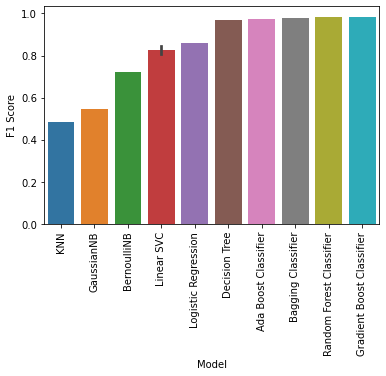

In [258]:
ax = sns.barplot(x="Model", y="F1 Score", data=comparisonDF)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

## ROC Curve

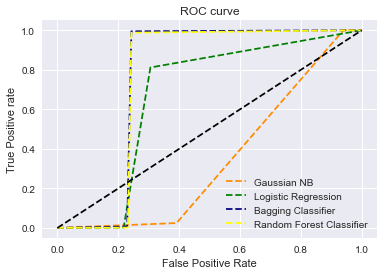

In [307]:
fpr_gnb, tpr_gnb, thresh_gnb = roc_curve(y_test, gnbPrediction, pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, classPredictionLr, pos_label=1)
fpr_bc, tpr_bc, thresh_bc = roc_curve(y_test, bagginClassifierPrediction, pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, randomForestPrediction, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr_gnb, tpr_gnb, linestyle='--',color='darkorange', label='Gaussian NB')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr_bc, tpr_bc, linestyle='--',color='navy', label='Bagging Classifier')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='yellow', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

## Hyperparameter Tuning

In [153]:
comparisonColumnsTuning = ['Model','Testing Accuracy','Precision','Recall','F1 Score']
comparisonColumnsTuningData = []

## Tuning Gaussian NB

In [154]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=5.336699231206313e-07)


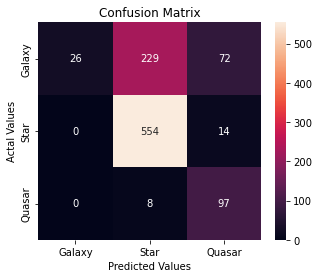

In [155]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
tunedGaussianNBPrediction = model(nbModel_grid, "Tuned GaussianNB", X_train, y_train, False)
print(nbModel_grid.best_estimator_)
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
plotConfusionMatrixDF(gnbConfusionMatrix)

In [156]:
testAccuracy = round(accuracy_score(y_test,tunedGaussianNBPrediction)*100,2)
precision, recall, f1score, support = score(y_test, tunedGaussianNBPrediction, average='macro')

In [157]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='GaussianNB'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned GaussianNB",testAccuracy,precision,recall,f1score])

## Tuning Logistic Regression

In [158]:
lr = LogisticRegression(solver='newton-cg', penalty = 'l2', C=0.001)

In [159]:
tunedLr = model(lr,"Tuned LR",X_train, y_train, False)

In [160]:
testAccuracy = round(accuracy_score(y_test,tunedLr)*100,2)
precision, recall, f1score, support = score(y_test, tunedLr, average='macro')

In [161]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Logistic Regression'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned LR",testAccuracy,precision,recall,f1score])

## Tuning Bagging Classifier

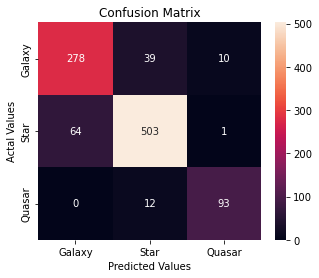

In [162]:
tunedBaggingClassifier= BaggingClassifier(base_estimator=logisticRegression, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=7)
tunedClassPredictionBag = model(tunedBaggingClassifier,"Tuned Bagging Classifier",X_train, y_train, False)
bagClassConfusionMatrix = confusion_matrix(y_test,tunedClassPredictionBag)
plotConfusionMatrixDF(bagClassConfusionMatrix)

In [163]:
testAccuracy = round(accuracy_score(y_test,tunedClassPredictionBag)*100,2)
precision, recall, f1score, support = score(y_test, tunedClassPredictionBag, average='macro')

In [164]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Bagging Classifier'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned Bagging Classifier",testAccuracy,precision,recall,f1score])

## Random Forest Classifier

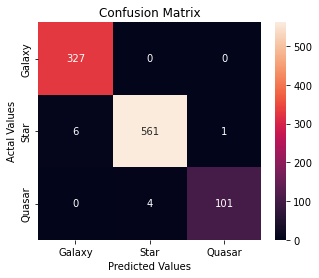

In [165]:
tunedRandomForestClassifier = RandomForestClassifier(n_estimators=25)
tunedClassPredictionRF=model(tunedRandomForestClassifier,"Tuned Random Forest Classifier",X_train, y_train, False)
rfClassConfusionMatrix = confusion_matrix(y_test,tunedClassPredictionRF)
plotConfusionMatrixDF(rfClassConfusionMatrix)

In [166]:
testAccuracy = round(accuracy_score(y_test,tunedClassPredictionRF)*100,2)
precision, recall, f1score, support = score(y_test, tunedClassPredictionRF, average='macro')

In [167]:
comparisonColumnsTuningData.append(comparisonDF[comparisonDF['Model']=='Random Forest Classifier'].values.flatten().tolist())
comparisonColumnsTuningData.append(["Tuned Random Forest Classifier",testAccuracy,precision,recall,f1score])

In [168]:
tuningDf = pd.DataFrame(comparisonColumnsTuningData,columns=comparisonColumnsTuning)
tuningDf

,Model,Testing Accuracy,Precision,Recall,F1 Score
0,GaussianNB,67.7,0.743478,0.659557,0.545408
1,Tuned GaussianNB,80.8,0.823736,0.801312,0.796323
2,Logistic Regression,84.9,0.871259,0.862614,0.861676
3,Tuned LR,71.6,0.769929,0.602357,0.644489
4,Bagging Classifier,98.7,0.980497,0.976844,0.978634
5,Tuned Bagging Classifier,87.4,0.871680,0.873810,0.872552
6,Random Forest Classifier,98.8,0.987749,0.980019,0.983734
7,Tuned Random Forest Classifier,98.9,0.988366,0.983194,0.985682
